In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df=pd.read_csv('Bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,17-09-2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,18-09-2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,19-09-2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,20-09-2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,21-09-2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df["Date"]=pd.to_datetime(df["Date"])

C:\Users\Purushoth\AppData\Local\Temp\ipykernel_17764\1380596044.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"]=pd.to_datetime(df["Date"])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2683 non-null   datetime64[ns]
 1   Open       2683 non-null   float64       
 2   High       2683 non-null   float64       
 3   Low        2683 non-null   float64       
 4   Close      2683 non-null   float64       
 5   Adj Close  2683 non-null   float64       
 6   Volume     2683 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 146.9 KB


In [7]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['date']=df['Date'].dt.day

In [8]:
df.drop('Date',axis=1,inplace=True)

In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
year         0
month        0
date         0
dtype: int64

In [10]:
[features for features in df.columns if df[features].dtype=="int64"]

['year', 'month', 'date']

In [11]:
## there is no duplicate values...
df.duplicated().sum()

0

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,date
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,2014,9,17
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,2014,9,18
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,2014,9,19
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,2014,9,20
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,2014,9,21


<Axes: xlabel='year', ylabel='Volume'>

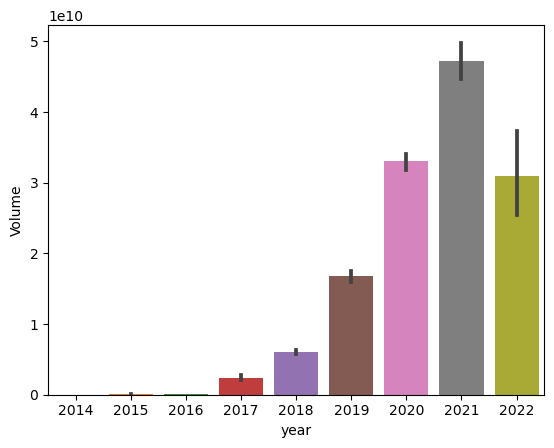

In [13]:
sns.barplot(data=df,x='year',y='Volume')

<Axes: xlabel='month', ylabel='Volume'>

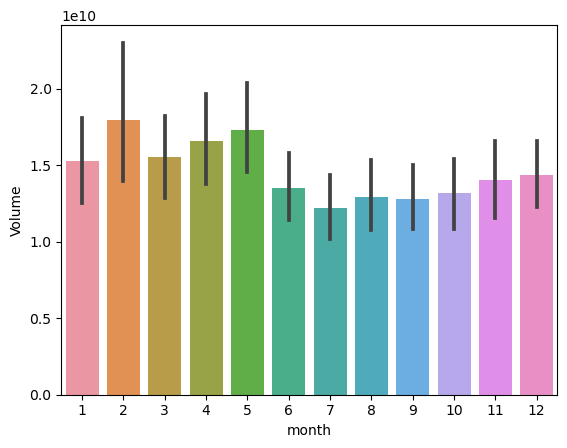

In [14]:
sns.barplot(data=df,x='month',y='Volume')

<Axes: xlabel='month', ylabel='Close'>

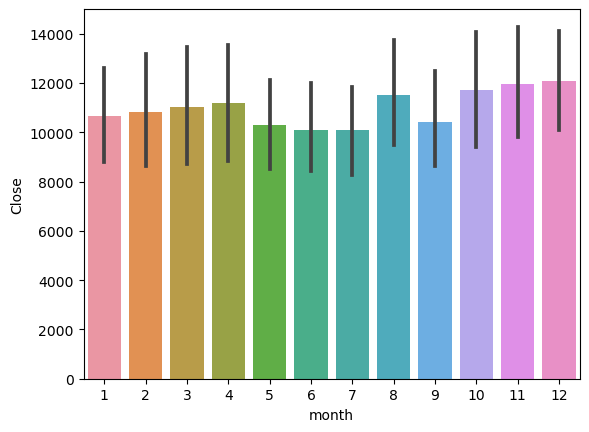

In [15]:
sns.barplot(data=df,x='month',y='Close')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,year,month,date
Open,1.000000,0.999535,0.999096,0.998846,0.998846,0.733541,0.743665,0.024622,-0.010378
High,0.999535,1.000000,0.999042,0.999496,0.999496,0.737056,0.743379,0.023567,-0.010515
Low,0.999096,0.999042,1.000000,0.999400,0.999400,0.726051,0.744496,0.025873,-0.010478
Close,0.998846,0.999496,0.999400,1.000000,1.000000,0.732466,0.744054,0.024105,-0.011216
Adj Close,0.998846,0.999496,0.999400,1.000000,1.000000,0.732466,0.744054,0.024105,-0.011216
Volume,0.733541,0.737056,0.726051,0.732466,0.732466,1.000000,0.769721,-0.055564,-0.022073
year,0.743665,0.743379,0.744496,0.744054,0.744054,0.769721,1.000000,-0.064602,-0.035689
month,0.024622,0.023567,0.025873,0.024105,0.024105,-0.055564,-0.064602,1.000000,0.031365
date,-0.010378,-0.010515,-0.010478,-0.011216,-0.011216,-0.022073,-0.035689,0.031365,1.000000


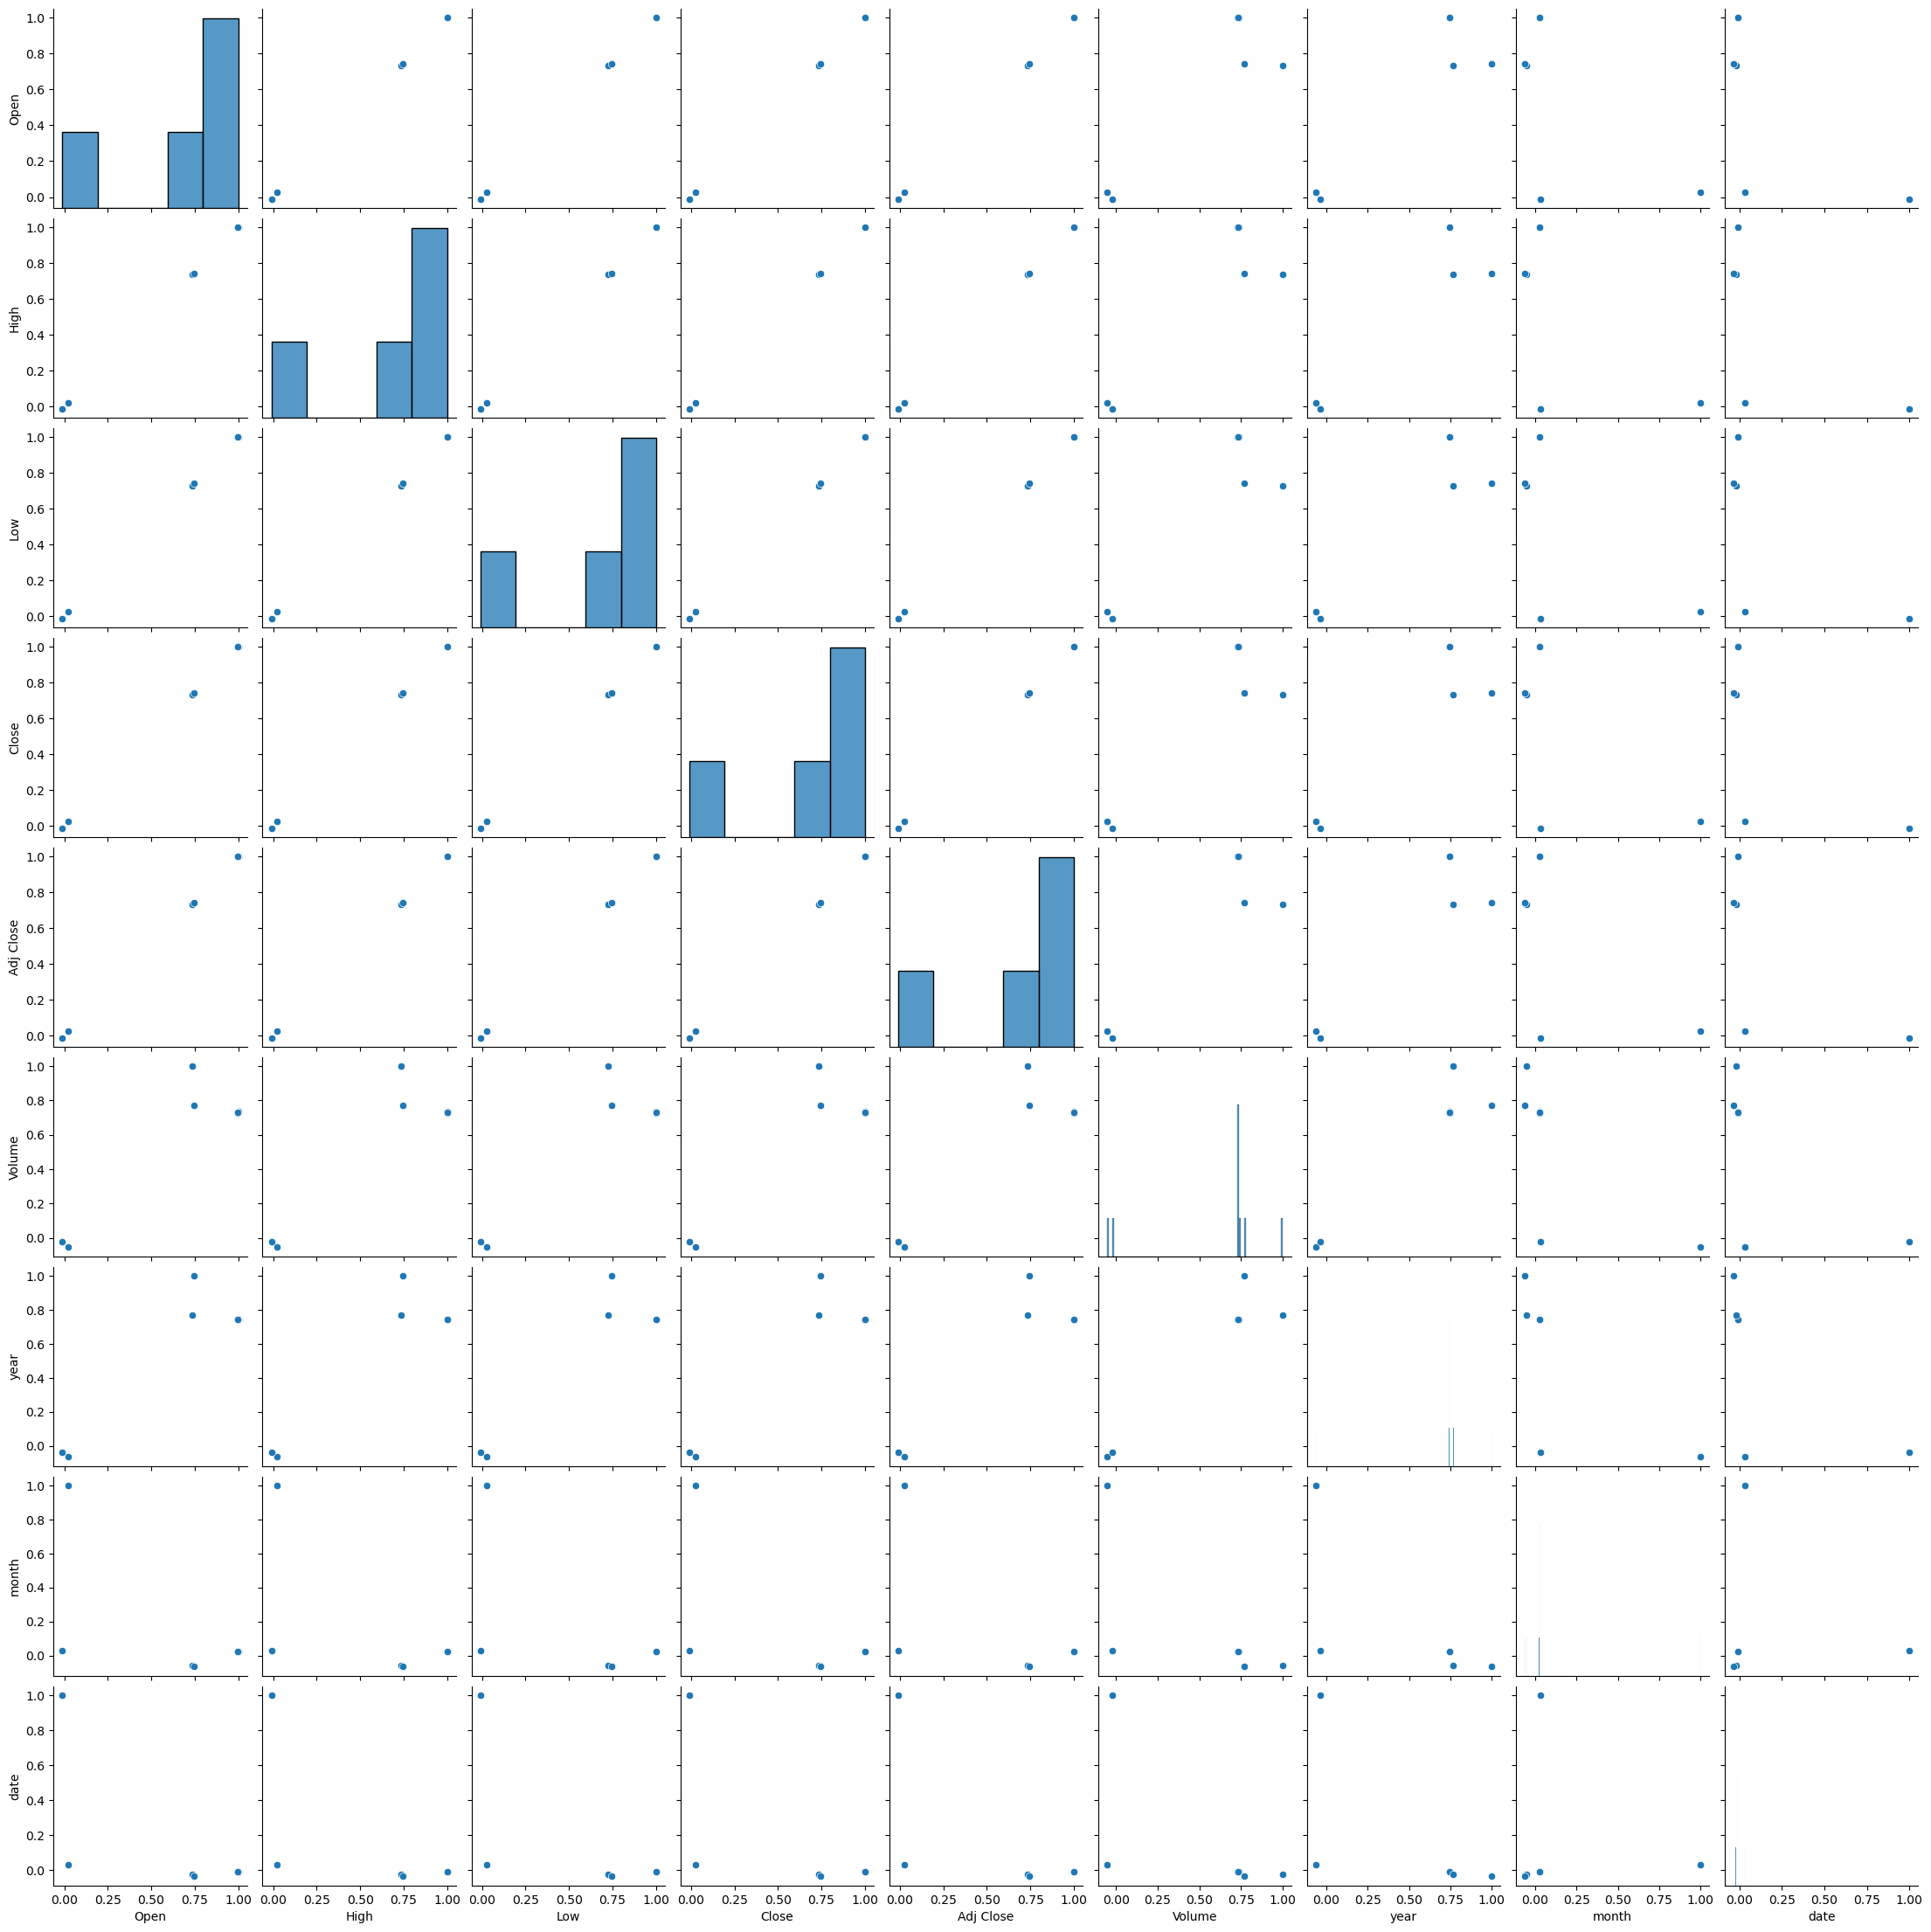

In [18]:
sns.pairplot(df.corr())

Text(0, 0.5, 'Close')

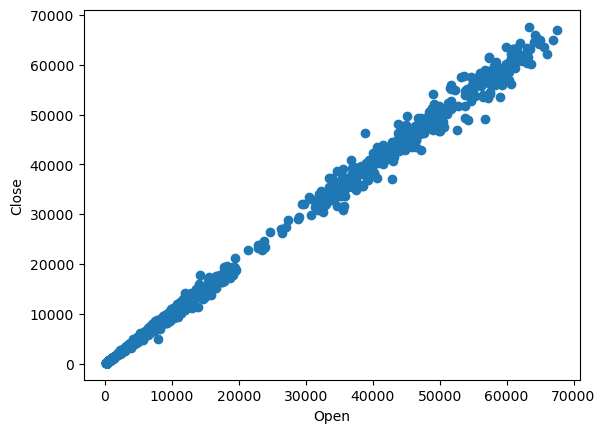

In [19]:
plt.scatter(df['Open'],df['Close'])
plt.xlabel("Open")
plt.ylabel("Close")

<Axes: xlabel='High', ylabel='Low'>

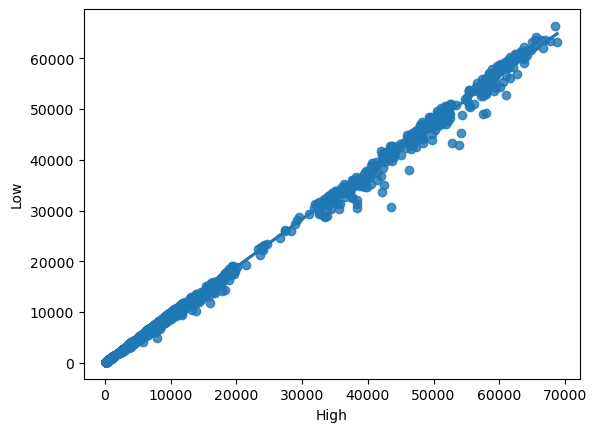

In [20]:
sns.regplot(data=df,x="High",y="Low")

In [21]:
ds=df.head(20)
ds

,Open,High,Low,Close,Adj Close,Volume,year,month,date
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,2014,9,17
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,2014,9,18
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,2014,9,19
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,2014,9,20
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,2014,9,21
5,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0,2014,9,22
6,402.092010,441.557007,396.196991,435.790985,435.790985,45099500.0,2014,9,23
7,435.751007,436.112000,421.131989,423.204987,423.204987,30627700.0,2014,9,24
8,423.156006,423.519989,409.467987,411.574005,411.574005,26814400.0,2014,9,25
9,411.428986,414.937988,400.009003,404.424988,404.424988,21460800.0,2014,9,26


In [22]:
col = df.pop("Close")

In [23]:
df.insert(8, col.name, col)

In [24]:
col = df.pop("year")

In [25]:
df.insert(0, col.name, col)

In [26]:
col = df.pop("month")

In [27]:
df.insert(1, col.name, col)

In [28]:
col = df.pop("date")

In [29]:
df.insert(2, col.name, col)

In [30]:
df.head()

,year,month,date,Open,High,Low,Adj Close,Volume,Close
0,2014,9,17,465.864014,468.174011,452.421997,457.334015,21056800.0,457.334015
1,2014,9,18,456.859985,456.859985,413.104004,424.440002,34483200.0,424.440002
2,2014,9,19,424.102997,427.834991,384.532013,394.795990,37919700.0,394.795990
3,2014,9,20,394.673004,423.295990,389.882996,408.903992,36863600.0,408.903992
4,2014,9,21,408.084991,412.425995,393.181000,398.821014,26580100.0,398.821014


In [32]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [33]:
x

,year,month,date,Open,High,Low,Adj Close,Volume
0,2014,9,17,465.864014,468.174011,452.421997,457.334015,2.105680e+07
1,2014,9,18,456.859985,456.859985,413.104004,424.440002,3.448320e+07
2,2014,9,19,424.102997,427.834991,384.532013,394.795990,3.791970e+07
3,2014,9,20,394.673004,423.295990,389.882996,408.903992,3.686360e+07
4,2014,9,21,408.084991,412.425995,393.181000,398.821014,2.658010e+07
...,...,...,...,...,...,...,...,...
2678,2022,1,16,43172.039060,43436.808590,42691.023440,43113.878910,1.790210e+10
2679,2022,1,17,43118.121090,43179.390630,41680.320310,42250.550780,2.169090e+10
2680,2022,1,18,42250.074220,42534.402340,41392.214840,42375.632810,2.241721e+10
2681,2022,1,19,42374.039060,42478.304690,41242.914060,41744.328130,2.309154e+10


In [34]:
y

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2678    43113.878910
2679    42250.550780
2680    42375.632810
2681    41744.328130
2682    41933.546880
Name: Close, Length: 2683, dtype: float64

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
x_train.shape

(1878, 8)

In [37]:
x_test.shape

(805, 8)

In [38]:
x_train.head()

,year,month,date,Open,High,Low,Adj Close,Volume
360,2015,12,9,239.854996,240.123993,234.753998,235.229004,1.796260e+07
1359,2018,7,6,7650.819824,7741.270020,7650.819824,7678.240234,4.485800e+09
604,2016,5,13,454.850006,457.054993,453.453003,455.670013,6.084500e+07
2270,2020,4,12,19446.966800,19511.404300,18697.193360,18699.765630,3.387239e+10
1744,2019,6,27,13017.125000,13311.144530,10491.852540,11182.806640,3.997748e+10


In [39]:
y_train.head()

360       235.229004
1359     7678.240234
604       455.670013
2270    18699.765630
1744    11182.806640
Name: Close, dtype: float64

In [40]:
## preprocessing...
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()
## we use fit_transform only in train but in test we use only transform...
## to prevent data leakege....
x_train=sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [60]:
import pickle
pickle.dump(sc,open('scaling.pkl','wb'))

In [61]:
## modeling.....
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', max_depth = 5, random_state = 42).fit(x_train, y_train)

In [62]:
y_pred = rf.predict(x_test)

In [63]:
y_pred

array([38509.97837477,  6194.57006347,  6676.5638952 ,   374.75488409,
         334.58615482,   331.93247606,   333.70087601,   333.78806467,
         346.74046025,   597.60701646,  9557.85425293, 36881.17431788,
         386.10244614,   384.40489634, 10504.00246241,  9531.60725528,
         329.68296701,  1453.31663366,  7899.6051283 ,  7981.78237363,
       18544.65221   , 46713.36680283,  9478.12359956,  3983.44864065,
       10249.44763596, 10592.06119875, 46949.38851354,  6658.84008837,
         330.66909641, 33382.72415977,   409.58756155,  8864.59645818,
       17952.80346844,   416.39593947,   357.77811893,  3821.88306808,
        6656.32113663,  1616.96942786,  3981.66217305,   354.05941234,
        7662.03176144,   334.25271446,   332.58392925,  8388.81483598,
         379.02227542,  2498.95330146, 10205.35687681,  9500.04980863,
       17412.50167213, 49985.77969766,  7548.2223392 , 10663.01938573,
         330.18324232,  7848.84349476,   718.42361158,   334.76140783,
      

In [64]:
## actualvalues....
y_test

2442    38402.222660
1134     5750.799805
1510     6419.660156
506       386.549011
211       228.572998
            ...     
2406    55724.265630
2245    15332.315430
275       244.606003
1453     6300.859863
256       230.190002
Name: Close, Length: 805, dtype: float64

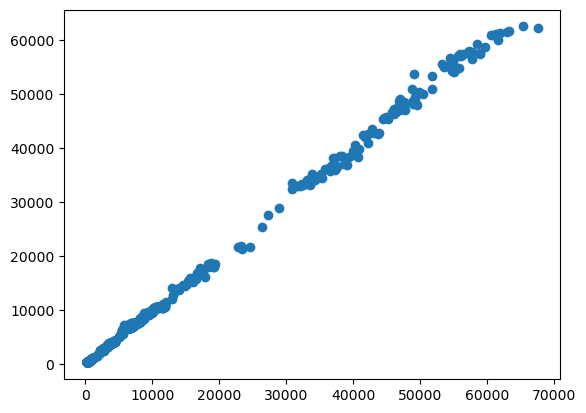

In [65]:
## to find that the model works well using ploting...
## this show that the actual and predicted almost same.....align in same places....
plt.scatter(y_test,y_pred)

In [66]:
## This above diagram plots the actual and predicted values in scatter plot..it all aligns in same line..

In [67]:
## and another method is that the residuals must follow normal distribution...
residuals = y_test-y_pred
residuals

2442    -107.755715
1134    -443.770258
1510    -256.903739
506       11.794127
211     -106.013157
           ...     
2406   -1193.173256
2245    -128.954975
275      -87.885034
1453    -345.598279
256     -102.577241
Name: Close, Length: 805, dtype: float64

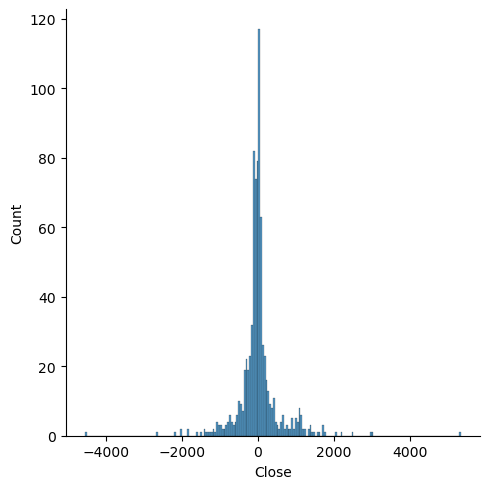

In [68]:
sns.displot(residuals)

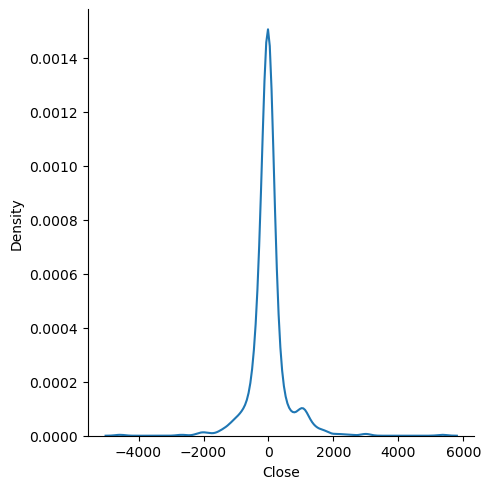

In [69]:
## and another method is that the residuals must follow normal distribution...
## it follows the normal distribution...
sns.displot(residuals,kind="kde")

In [70]:
from sklearn.metrics import mean_squared_error as mse
print(mse(y_test,y_pred))

323311.85656827746


In [71]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9986493665879675


In [72]:
rf.predict(x_test[23].reshape(1,-1))  

array([3983.44864065])

In [73]:
x_test[23].reshape(1,-1)

array([[-0.4116301 ,  0.68504142,  0.478739  , -0.44642623, -0.44604931,
        -0.44362263, -0.44804387, -0.66059341]])

In [74]:
import pickle

In [75]:
pickle.dump(rf,open('random.pkl','wb'))

In [76]:
pickled_model = pickle.load(open('random.pkl','rb'))

In [77]:
pickled_model.predict(x_test[23].reshape(1,-1))

array([3983.44864065])